# MVP For Medical Loop

In [55]:
# Please use numpy v2.
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pygame
import sys

# Dataframe Specifications

In [27]:
# Stores all customers
cs_df = pd.DataFrame({
    'Customer': ['A', 'B', 'C'],
    'Lat': [1,2,3],
    'Long': [1,2,3]
})
cs_df = cs_df.set_index('Customer')
cs_df

,Lat,Long
Customer,,
A,1,1
B,2,2
C,3,3


In [4]:
meds_df = pd.DataFrame({
    'Medicine': ['A', 'B'],
    'Lifespan': [10, 20]
})

# Main Game Loop

In [63]:
# Stores all pharmacies
rx_df = pd.DataFrame({
    'Pharmacy': ['pharm1'],
    'Lat': [1],
    'Long': [1],
    'Stock': [Counter({"A":10})],
    'Demand': [Counter({"A":1})]
})
rx_df = rx_df.set_index('Pharmacy')

rec_df = pd.DataFrame({
    'Pharmacy': [],
    'Stock': [],
    'Demand': [],
    'Time': []
})
rec_df = rec_df.set_index('Pharmacy')

pygame.init()
screen = pygame.display.set_mode((500,500))
background_color = (255, 255, 255)
point_color = (0, 0, 0)
pharm_color = (100, 100, 100)

clock = pygame.time.Clock()
running = True

frame = 1
while running:
    # White background
    screen.fill(background_color)

    # Print every resident
    for cs in cs_df.index:
        pygame.draw.circle(
            screen, point_color, 
            (cs_df.loc[cs].Lat*100, cs_df.loc[cs].Long*100), 10
        )
    
    # Print the pharmacies
    for rx in rx_df.index:
        pygame.draw.circle(
            screen, pharm_color,
            (rx_df.loc[rx].Lat*100, rx_df.loc[rx].Long*100), 15
        )

    # Update records
    rx_df['Time'] = frame
    rec_df = pd.concat([rec_df,rx_df])
    rx_df.Stock = rx_df.Stock - rx_df.Demand

    # Update to next frame (1 fps)
    pygame.display.flip()
    clock.tick(1)
    frame += 1

    # Handle quitting TODO BROKEN
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False

pygame.quit()
rec_df

,Stock,Demand,Time,Lat,Long
Pharmacy,,,,,
pharm1,{'A': 10},{'A': 1},1.0,1.0,1.0
pharm1,{'A': 9},{'A': 1},2.0,1.0,1.0
pharm1,{'A': 8},{'A': 1},3.0,1.0,1.0


# Plotting of Data

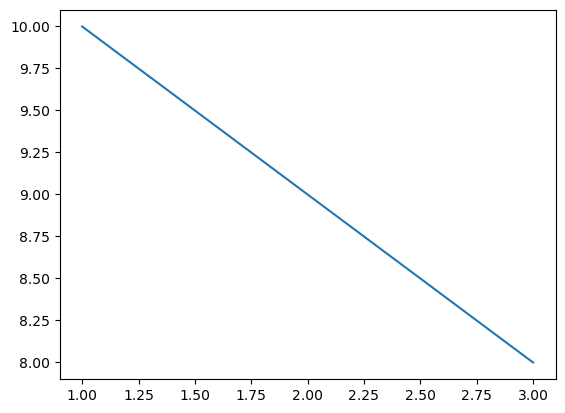

In [65]:
def plot_recs(pharm, med):
    x = rec_df.loc[pharm].Time
    y = rec_df.loc[pharm].Stock.apply(lambda x: x[med]).values
    plt.plot(x,y)

plot_recs('pharm1','A')